In [2]:
import torch
from torchvision import transforms
import tqdm
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
import json

In [4]:
with open("..\data\images\mitosis_img_005.json", "r") as read_file:
    data = json.load(read_file)
print(data.keys)
print(data.get("imagesHeight"))

<built-in method keys of dict object at 0x000001FDA9B89EC0>
None


In [5]:
shapes = data.get("shapes")

In [6]:
print(shapes[0].keys())

dict_keys(['label', 'points', 'group_id', 'shape_type', 'flags'])


In [8]:
scale = 4
target = torch.empty(data.get("imageHeight"), data.get("imageWidth"))
print(target.shape)
print(len(shapes))
for i in range(len(shapes)):
    x_pos = round(shapes[i].get("points")[0][1])
    y_pos = round(shapes[i].get("points")[0][0])
    target[x_pos][y_pos] = 1

torch.Size([4032, 3024])
256


torch.Size([200, 300])
tensor(3)


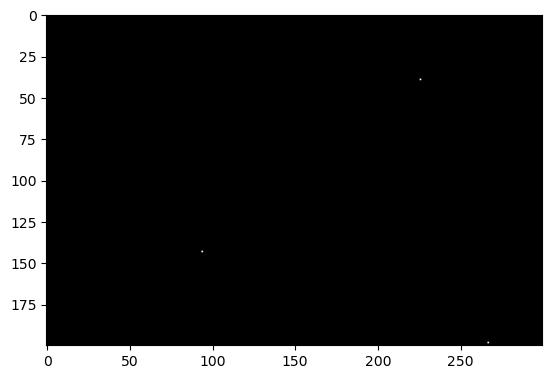

In [9]:
point = target[500:700, 1200:1500]
print(point.shape)
plt.imshow(point, cmap="gray")
print(torch.count_nonzero(point))

In [14]:
img = Image.open("..\data\images\mitosis_img_005.jpg").convert("L")
img = transforms.ToTensor()(img).squeeze()

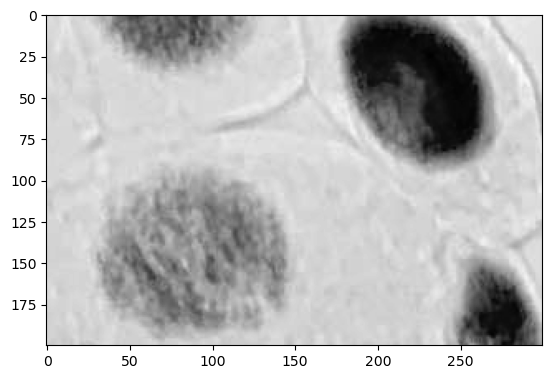

In [15]:
plt.imshow(img[500:700, 1200:1500], cmap='gray')